In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
%matplotlib inline


# Any results you write to the current directory are saved as output.

In [176]:
train_df = pd.read_csv('/Users/pranavbarot/Downloads/movie_comments/train.tsv', sep = '\t')
test_df = pd.read_csv('/Users/pranavbarot/Downloads/movie_comments/test.tsv', sep = '\t')

In [6]:
sample = train_df
lengths= [len(i) for i in sample['Phrase'].tolist()]
sample['length'] = lengths

In [7]:
pd.set_option('max_colwidth', 200)
sample

,PhraseId,SentenceId,Phrase,Sentiment,length
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,188
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,77
2,3,1,A series,2,8
3,4,1,A,2,1
4,5,1,series,2,6
5,6,1,of escapades demonstrating the adage that what is good for the goose,2,68
6,7,1,of,2,2
7,8,1,escapades demonstrating the adage that what is good for the goose,2,65
8,9,1,escapades,2,9
9,10,1,demonstrating the adage that what is good for the goose,2,55


In [158]:
#training_full =sample.sort_values('length', ascending=False).drop_duplicates('SentenceId').sort_values('SentenceId')
training_full = sample

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2124f2e8>]],
      dtype=object)

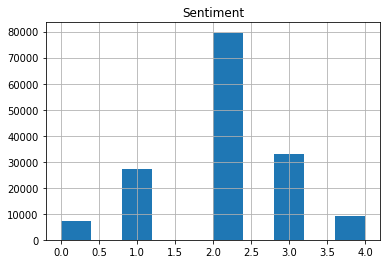

In [159]:
training_full.hist('Sentiment')


In [160]:
training_full

,PhraseId,SentenceId,Phrase,Sentiment,length
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,188
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,77
2,3,1,A series,2,8
3,4,1,A,2,1
4,5,1,series,2,6
5,6,1,of escapades demonstrating the adage that what is good for the goose,2,68
6,7,1,of,2,2
7,8,1,escapades demonstrating the adage that what is good for the goose,2,65
8,9,1,escapades,2,9
9,10,1,demonstrating the adage that what is good for the goose,2,55


In [161]:
from collections import Counter
import gensim
##good enough class imbalance
Counter(training_full['Sentiment'])

Counter({1: 27273, 2: 79582, 3: 32927, 4: 9206, 0: 7072})

In [162]:
full_corpus = list(training_full['Phrase'].tolist())
full_corpus = [i.split(" ") for i in full_corpus]
for i,sentence in enumerate(full_corpus):
    sentence = [x.lower() for x in sentence]
    full_corpus[i] = sentence

In [163]:
model = gensim.models.Word2Vec(
    full_corpus,
    size=150,
    window=10,
    min_count=1,
    workers=10)
model.train(full_corpus, total_examples=len(full_corpus), epochs=10)

(8612366, 11241590)

In [164]:
model['that'].shape

/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(150,)

In [165]:
import numpy as np
word_vectors = []

for sentence in full_corpus:
    vector = np.empty([150,])
    for word in sentence:
        vector = vector + model[word]
    word_vectors.append(vector)    

/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [166]:
print(len(word_vectors), len(full_corpus))

156060 156060


In [167]:
training_full['word_vectors'] = word_vectors
training_full.head()

,PhraseId,SentenceId,Phrase,Sentiment,length,word_vectors
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,188,"[-2.6815615859885194e+154, 2.686789046496192e+154, 7.3702636005182285, 104.20434066362213, -1.4727560032042675, 103.23271645558998, -65.42527254624292, 102.6464263522139, -32.46967101620976, 113.4..."
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,77,"[-2.6815615859885194e+154, 2.686789046496192e+154, 9.41729152741027, 100.17056290514302, -7.5977534700068645, 107.74463200522587, -69.99557193322107, 112.62283361936716, -21.579440293484367, 120.7..."
2,3,1,A series,2,8,"[-2.6815615859885194e+154, 2.686789046496192e+154, 7.956355010886909, 103.99842680699658, -6.482294698420446, 109.59926524711773, -71.50905703706667, 114.82207564498094, -19.660202664905228, 121.5..."
3,4,1,A,2,1,"[-2.6815615859885194e+154, 2.686789046496192e+154, 12.760044967551949, 97.42715133435559, -5.174085353675764, 110.84114316059276, -72.9413016657345, 115.90906621004251, -15.816878718906082, 120.68..."
4,5,1,series,2,6,"[-2.6815615859885194e+154, 2.686789046496192e+154, 7.956355010886909, 103.99842680699658, -6.482294698420446, 109.59926524711773, -71.50905703706667, 114.82207564498094, -19.660202664905228, 121.5..."


In [168]:
new_vectors = []

for array in training_full['word_vectors'].tolist():
    new_array = np.nan_to_num(array)
    new_vectors.append(new_array)

In [169]:
len(new_vectors)
training_full['word_vectors'] = new_vectors

In [170]:
training_full.head()

,PhraseId,SentenceId,Phrase,Sentiment,length,word_vectors
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,188,"[-2.6815615859885194e+154, 2.686789046496192e+154, 7.3702636005182285, 104.20434066362213, -1.4727560032042675, 103.23271645558998, -65.42527254624292, 102.6464263522139, -32.46967101620976, 113.4..."
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,77,"[-2.6815615859885194e+154, 2.686789046496192e+154, 9.41729152741027, 100.17056290514302, -7.5977534700068645, 107.74463200522587, -69.99557193322107, 112.62283361936716, -21.579440293484367, 120.7..."
2,3,1,A series,2,8,"[-2.6815615859885194e+154, 2.686789046496192e+154, 7.956355010886909, 103.99842680699658, -6.482294698420446, 109.59926524711773, -71.50905703706667, 114.82207564498094, -19.660202664905228, 121.5..."
3,4,1,A,2,1,"[-2.6815615859885194e+154, 2.686789046496192e+154, 12.760044967551949, 97.42715133435559, -5.174085353675764, 110.84114316059276, -72.9413016657345, 115.90906621004251, -15.816878718906082, 120.68..."
4,5,1,series,2,6,"[-2.6815615859885194e+154, 2.686789046496192e+154, 7.956355010886909, 103.99842680699658, -6.482294698420446, 109.59926524711773, -71.50905703706667, 114.82207564498094, -19.660202664905228, 121.5..."


In [171]:
train_x = training_full['word_vectors'].tolist()
train_y = training_full['Sentiment'].tolist()

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', OneVsRestClassifier(LinearSVC())),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}

In [173]:
clf = LinearSVC()
clf.fit(train_x, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [177]:
len(test_df)

66292

In [178]:
test_df['length'] = [len(phrase) for phrase in test_df['Phrase']]

In [179]:
testvectors = []

for sentence in test_df['Phrase']:
    vector = np.empty([150,])
    for word in sentence:
        try:
            vector = vector + model[word.lower()]
        except:
            vector = vector + np.ones([150,])
    testvectors.append(vector)                
            

/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [180]:
test_df['word_vectors'] = testvectors

In [181]:
new_vectors = []

for array in test_df['word_vectors'].tolist():
    new_array = np.nan_to_num(array)
    new_vectors.append(new_array)

In [182]:
test_df['word_vectors'] = new_vectors

In [183]:
test_df.tail()

,PhraseId,SentenceId,Phrase,length,word_vectors
66287,222348,11855,"A long-winded , predictable scenario .",38,"[3228.3872049227357, 4032.6750799106667, 7245.0494729809, 3676.512146735098, 3824.7229821961373, 5459.484179980529, 2858.349259672221, 8201.209870068822, 3776.5539792752825, 5947.637185509317, 567..."
66288,222349,11855,"A long-winded , predictable scenario",36,"[3237.5624410118908, 4042.1138979812386, 7269.424161334289, 3684.0609742193483, 3831.84248926118, 5472.071340895665, 2864.989368028473, 8227.55360440677, 3783.388757882174, 5963.465279742144, 5695..."
66289,222350,11855,"A long-winded ,",15,"[3243.1633881432936, 4045.863981132279, 7280.583564427448, 3685.8823675862513, 3832.2476211600006, 5476.751035093737, 2865.997369339224, 8238.12420694111, 3786.542930239346, 5971.115126582794, 570..."
66290,222351,11855,A long-winded,13,"[3246.493183389306, 4046.2713673781836, 7287.862795968307, 3688.6340070082806, 3834.295738968998, 5479.821524403465, 2869.9296536478214, 8241.748844364192, 3785.0200605294667, 5975.561294219457, 5..."
66291,222352,11855,predictable scenario,20,"[3249.577462079935, 4052.400058284751, 7300.050980881555, 3691.726115760859, 3840.579588094726, 5486.4437465886, 2873.0976638975553, 8255.671536263544, 3789.6184515221976, 5983.784638545476, 5718...."


In [184]:
predictions = []
for test_vector in test_df['word_vectors']:
    predictions.append(clf.predict(test_vector.reshape(1,-1)))

In [186]:
predictions = [np.asscalar(i) for i in predictions]

In [189]:
test_df['Sentiment'] = predictions

In [197]:
test_df[test_df['Sentiment'] == 3]

,PhraseId,SentenceId,Phrase,length,word_vectors,Sentiment
614,156675,8562,poor -- if durable --,21,"[89.16417253855616, 41.1408799670171, 177.51211653277278, 23.922575425356627, 39.02912867628038, 78.79364579543471, 62.53365128673613, 142.16883935499936, 22.704958636313677, 127.13519639894366, 1...",3
615,156676,8562,poor,4,"[87.03091310150921, 42.97499991371296, 175.90568475052714, 26.71364663168788, 40.82300719805062, 79.69154431670904, 61.3360495287925, 144.19603920541704, 25.118059810250998, 127.42563146725297, 15...",3
616,156677,8562,-- if durable --,16,"[98.29136880580336, 42.68900728458539, 192.71834306418896, 24.900639936327934, 37.899233462288976, 83.07596320286393, 68.64523464813828, 151.00437280349433, 19.640190228819847, 137.68256858363748,...",3
617,156678,8562,--,2,"[99.9222494000569, 41.11040687793866, 194.8498979061842, 23.69602732360363, 35.42379701323807, 82.4492352642119, 69.31933659687638, 150.23386046104133, 17.199320420622826, 138.7002616263926, 181.1...",3
618,156679,8562,if durable --,13,"[105.28526378516108, 44.572461392963305, 204.59380992129445, 24.754132080823183, 38.86160429753363, 86.56678409874439, 73.36425681971014, 158.28028446249664, 18.526924047619104, 145.01935980841517...",3
619,156680,8562,if durable,10,"[106.38651698175818, 50.19171672128141, 209.07461225241423, 27.221462063491344, 46.250284479931, 90.93778881058097, 75.06097314506769, 166.86773314885795, 23.736267291009426, 148.3030719049275, 19...",3
620,156681,8562,if,2,"[108.07475882861763, 51.602165188640356, 211.85547143779695, 27.367537420243025, 47.12107457406819, 90.91850757598877, 75.78884442895651, 170.91145771555603, 22.6979864500463, 150.00455704703927, ...",3
621,156682,8562,durable,7,"[108.72715267632157, 53.10370133235119, 214.4414862189442, 27.64742647111416, 50.17445174790919, 93.54788051173091, 76.82890341617167, 173.68456868641078, 25.444855973124504, 151.91625810787082, 1...",3
622,156683,8562,imitation,9,"[112.52579644415528, 57.49965709983371, 223.99904607236385, 28.85639526322484, 52.476546408608556, 95.69713596999645, 78.44850149331614, 187.2379338350147, 23.84905942156911, 158.69883930683136, 1...",3
623,156684,8563,"A depressing confirmation of everything those of us who do n't object to the description `` unelected '' have suspected all along : George W. Bush is an incurious , uncharismatic , overgrown frat ...",232,"[170.78248378355056, 133.11043717723805, 354.34263119776733, 99.17680970812216, 128.30457834573463, 188.44352135021472, 138.44594701658934, 347.5030773556791, 99.84418641263619, 268.84033382032067...",3


In [196]:
Counter(predictions)

Counter({0: 51657, 2: 12437, 1: 55, 3: 2143})

In [198]:
output_df = test_df[['PhraseId', 'Sentiment']]

In [200]:
output_df.to_csv('sample_submission.csv', index=False)
